## Lectura New Hampshire

Lectura de los archivos de reviews de New Hampshire

In [1]:
import pandas as pd
import numpy as np
import missingno as msxo
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

Lectura de archivos json de las reviews efectuadas en el estado de New Hampshire. Voy a proceder a realizar la lectura y juntar dichos archivos, al tener todos la misma estructura es posible realizarlo mediante iteracion.

In [2]:
df_1 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-New_Hampshire/1.json', lines= True)
df_2 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-New_Hampshire/2.json', lines= True)
df_3 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-New_Hampshire/3.json', lines= True)
df_4 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-New_Hampshire/4.json', lines= True)
df_5 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-New_Hampshire/5.json', lines= True)
df_6 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-New_Hampshire/6.json', lines= True)
df_7 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-New_Hampshire/7.json', lines= True)
df_8 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-New_Hampshire/8.json', lines= True)
df_9 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-New_Hampshire/9.json', lines= True)


C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encou

In [3]:
# Creo una lista para poder juntar todos los dataframes de los archivos en uno
dfs = []

# Itero entre cada uno de los dataframes para juntarlos en uno solo
for i in range(1, 10):
    
    df = globals()[f'df_{i}']
    dfs.append(df)


reviews_New_Hampshire = pd.concat(dfs, ignore_index=True)

In [4]:
# Vista primeros registros

reviews_New_Hampshire.head(3)

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.073259e+20,Jeffrey J Howland,1621473866341,4,Like many campgrounds dust is a problem... but...,None,None,0x89e2936fffffffff:0x3fce71a3d83aa514
1,1.130123e+20,Nathaniel Houle,1604724170325,5,Nice clean and welcoming campground. Love the...,None,None,0x89e2936fffffffff:0x3fce71a3d83aa514
2,1.058399e+20,Shannon Thomas,1585573760111,5,❤Super friendly people and very well maintaine...,None,None,0x89e2936fffffffff:0x3fce71a3d83aa514


In [5]:
# Miro cuantos registros tenemos en el dataframe unido

reviews_New_Hampshire.shape

(1296603, 8)

In [6]:
# Miro el tipo de información

reviews_New_Hampshire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296603 entries, 0 to 1296602
Data columns (total 8 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   user_id  1296603 non-null  float64
 1   name     1296603 non-null  object 
 2   time     1296603 non-null  int64  
 3   rating   1296603 non-null  int64  
 4   text     712107 non-null   object 
 5   pics     32336 non-null    object 
 6   resp     132499 non-null   object 
 7   gmap_id  1296603 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 79.1+ MB


In [7]:
# Checkeo de nulos y su porcentaje

nulls = pd.DataFrame(reviews_New_Hampshire.isnull().sum().sort_values(ascending = False))
nulls["Porcentaje de nulos"] = round(nulls/reviews_New_Hampshire.shape[0]*100,2)
nulls.rename(columns = {0:"Nro nulos"})

,Nro nulos,Porcentaje de nulos
pics,1264267,97.51
resp,1164104,89.78
text,584496,45.08
user_id,0,0.00
name,0,0.00
time,0,0.00
rating,0,0.00
gmap_id,0,0.00


In [8]:
reviews_New_Hampshire.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id'], dtype='object')

In [9]:
reviews_New_Hampshire.user_id.nunique()

49024

En el estado de New Hampshire, tenemos 49024 usuarios que emitieron 1.3 M de reseñas.

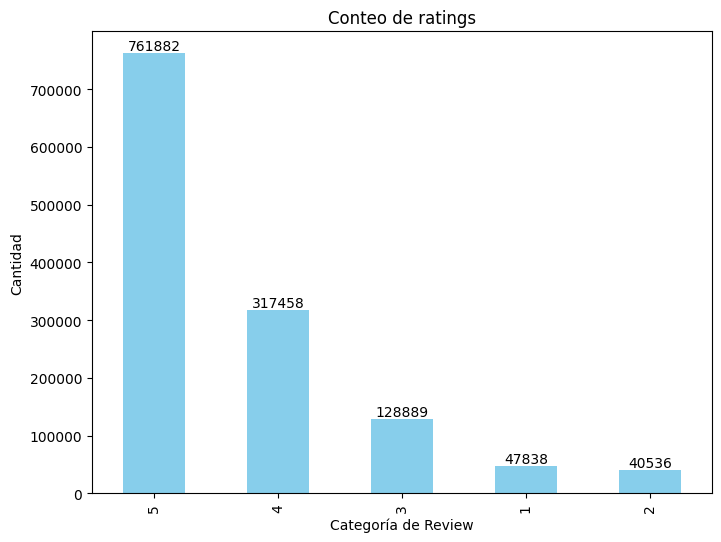

In [10]:
rating = reviews_New_Hampshire.rating.value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
rating.plot(kind='bar', color='skyblue')

# Agregar etiquetas a las barras
for i, count in enumerate(rating):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Configuración de etiquetas y título
plt.xlabel('Categoría de Review')
plt.ylabel('Cantidad')
plt.title('Conteo de ratings')

# Mostrar el gráfico
plt.show()


In [11]:
reviews_New_Hampshire['time'] = pd.to_datetime(reviews_New_Hampshire['time'], unit='ms').dt.strftime('%d/%m/%Y')

In [12]:
reviews_New_Hampshire['time'] = pd.to_datetime(reviews_New_Hampshire['time'], format='%d/%m/%Y')

reviews_New_Hampshire['year'] = reviews_New_Hampshire['time'].dt.year

In [13]:
min_date = reviews_New_Hampshire.time.min()
minimun_date = pd.to_datetime(min_date)
print(min_date)
print(minimun_date)

2007-06-20 00:00:00
2007-06-20 00:00:00


In [14]:
max_date = reviews_New_Hampshire.time.max()
maximun_date = pd.to_datetime(max_date)
print(max_date)
print(maximun_date)

2021-09-07 00:00:00
2021-09-07 00:00:00


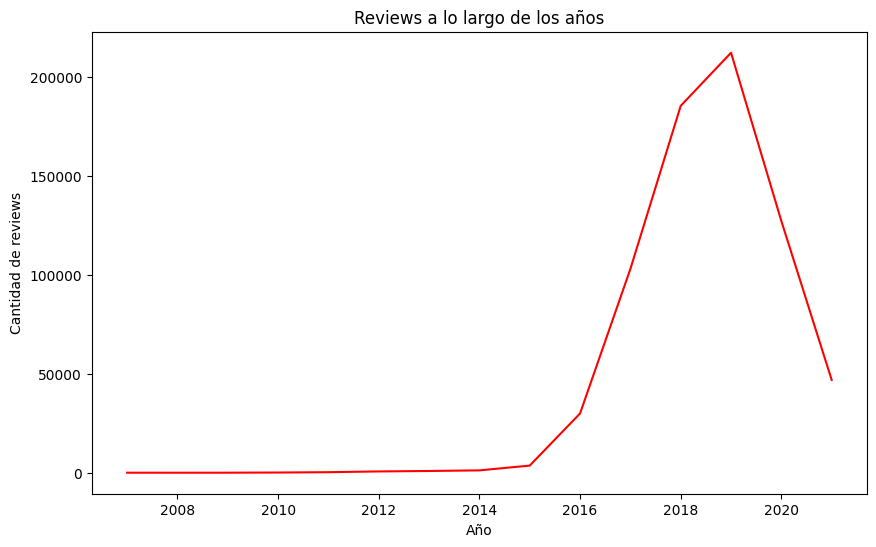

In [15]:
conteo_por_año= reviews_New_Hampshire[['year', 'text']].groupby('year').count().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=conteo_por_año, x='year', y= 'text', color='red')
plt.xlabel('Año')
plt.ylabel('Cantidad de reviews')
plt.title('Reviews a lo largo de los años')
plt.show()


In [16]:
reviews_New_Hampshire["text"] = reviews_New_Hampshire["text"].astype(str)

In [17]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


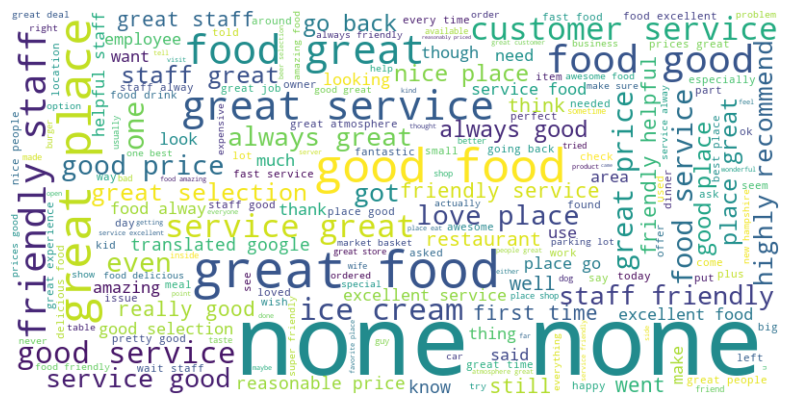

In [18]:
texto = " ".join(reviews_New_Hampshire["text"])

# Download NLTK data for tokenization and stopwords
nltk.download('punkt')
nltk.download('stopwords')

# Tokenization and removing stopwords
stop_words = set(stopwords.words("english"))
words = word_tokenize(texto)
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Join the words into a text string
texto_procesado = " ".join(words)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texto_procesado)

# Visualize the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
